In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.preprocessing import MinMaxScaler

In [15]:
df = pd.read_csv('C:\\Users\\aahsa\\Downloads\\cleaned_Recipes.csv')

In [11]:
df.head()

,RecipeId,Name,AuthorId,CookTime,PrepTime,TotalTime,Description,Images,RecipeCategory,Keywords,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,AuthorName
0,38,Low-Fat Berry Blue Frozen Dessert,1533,86400.0,2700,89100,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",Frozen Desserts,"c(""Dessert"", ""Low Protein"", ""Low Cholesterol"",...",...,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,1.0,Dancer
1,39,Biryani,1567,1500.0,14400,15900,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",Chicken Breast,"c(""Chicken Thigh & Leg"", ""Chicken"", ""Poultry"",...",...,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,1.0,elly9812
2,40,Best Lemonade,1566,300.0,1800,2100,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",Beverages,"c(""Low Protein"", ""Low Cholesterol"", ""Healthy"",...",...,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,1.0,Stephen Little
3,41,Carina's Tofu-Vegetable Kebabs,1586,1200.0,86400,87600,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",Soy/Tofu,"c(""Beans"", ""Vegetable"", ""Low Cholesterol"", ""We...",...,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,Cyclopz
4,42,Cabbage Soup,1538,1800.0,1200,3000,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",Vegetable,"c(""Low Protein"", ""Vegan"", ""Low Cholesterol"", ""...",...,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,1.0,Duckie067


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522517 entries, 0 to 522516
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RecipeId                    522517 non-null  int64  
 1   Name                        522517 non-null  object 
 2   AuthorId                    522517 non-null  int64  
 3   CookTime                    522517 non-null  float64
 4   PrepTime                    522517 non-null  int64  
 5   TotalTime                   522517 non-null  int64  
 6   Description                 522517 non-null  object 
 7   Images                      522517 non-null  object 
 8   RecipeCategory              522517 non-null  object 
 9   Keywords                    522517 non-null  object 
 10  RecipeIngredientQuantities  522517 non-null  object 
 11  RecipeIngredientParts       522517 non-null  object 
 12  RecipeInstructions          522517 non-null  object 
 13  AggregatedRati

Text(0.5, 1.0, 'Box plot of Sodium Content')

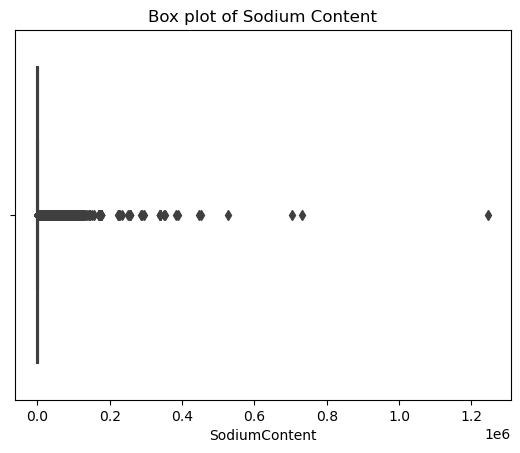

In [13]:
#Check outlier for SodiumContent
sns.boxplot(x=df['SodiumContent']) 
plt.title('Box plot of Sodium Content')

In [14]:
#Removing outliers for all the nutrition values
import pandas as pd

# Assuming your DataFrame is named df
columns = ['Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent', 'SodiumContent', 
           'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent']

for column in columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

Text(0.5, 1.0, 'Box plot of Sodium Content')

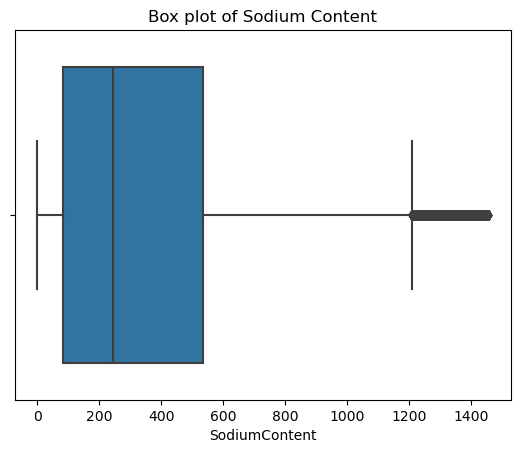

In [15]:
#check if Removing outliers for the Sodium content worked:
sns.boxplot(x=df['SodiumContent']) 
plt.title('Box plot of Sodium Content')

In [16]:
scaler = MinMaxScaler()
# Normalize the cooking times
cooking_times = df[['CookTime', 'PrepTime', 'TotalTime']]
normalized_times = scaler.fit_transform(cooking_times)

# Add the normalized times back to the DataFrame
df[['CookTime', 'PrepTime', 'TotalTime']] = normalized_times

# Display the normalized cooking times
print(df[['CookTime', 'PrepTime', 'TotalTime']].head())

       CookTime  PrepTime     TotalTime
0  3.306840e-05  0.000347  3.409654e-05
4  6.885502e-07  0.000154  1.148032e-06
7  1.147839e-06  0.000231  1.836851e-06
8  0.000000e+00  0.000193  5.740159e-07
9  2.062972e-07  0.000424  1.469481e-06


In [17]:
# One-hot coding for RecipeIngredientQuantities

ingredient_quantities = df['RecipeIngredientQuantities']
vectorizer = HashingVectorizer(n_features=2**10)  # Adjust n_features as needed

# Fit and transform the data
encoded_quantities = vectorizer.fit_transform(ingredient_quantities)
encoded_df = pd.DataFrame(encoded_quantities.toarray())
df = pd.concat([df, encoded_df], axis=1)

# Drop the original 'RecipeIngredientQuantities' column if needed
df.drop('RecipeIngredientQuantities', axis=1, inplace=True)

# Display the updated DataFrame
print(df.head())


   RecipeId                                        Name  AuthorId  \
0      38.0           Low-Fat Berry Blue Frozen Dessert    1533.0   
4      42.0                                Cabbage Soup    1538.0   
7      45.0  Buttermilk Pie With Gingersnap Crumb Crust    1580.0   
8      46.0                     A Jad - Cucumber Pickle    1533.0   
9      47.0                        Butter Pecan Cookies    1573.0   

       CookTime  PrepTime     TotalTime  \
0  3.306840e-05  0.000347  3.409654e-05   
4  6.885502e-07  0.000154  1.148032e-06   
7  1.147839e-06  0.000231  1.836851e-06   
8  0.000000e+00  0.000193  5.740159e-07   
9  2.062972e-07  0.000424  1.469481e-06   

                                         Description  \
0  Make and share this Low-Fat Berry Blue Frozen ...   
4  Make and share this Cabbage Soup recipe from F...   
7  Make and share this Buttermilk Pie With Ginger...   
8  Make and share this A Jad - Cucumber Pickle re...   
9  Make and share this Butter Pecan Cookies re

In [6]:
#Normalizing the rating
scaler = MinMaxScaler()
df['NormalizedRating'] = scaler.fit_transform(df[['AggregatedRating']])
print(df[['AggregatedRating', 'NormalizedRating']].head())

   AggregatedRating  NormalizedRating
0               4.5             0.875
1               3.0             0.500
2               4.5             0.875
3               4.5             0.875
4               4.5             0.875


In [36]:
max_review_count = df['ReviewCount'].max()
print(f"The maximum value of ReviewCount is: {max_review_count}")


The maximum value of ReviewCount is: 2273.0


In [42]:
#ReviewCount Bins
bins = [0, 10, 50, 100, 500, float('inf')]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

df['ReviewCountBins'] = pd.cut(df['ReviewCount'], bins=bins, labels=labels, right=False)
print(df[['ReviewCount', 'ReviewCountBins']].head())

   ReviewCount ReviewCountBins
0          4.0        Very Low
4         11.0             Low
7          3.0        Very Low
8          2.0        Very Low
9          2.0        Very Low


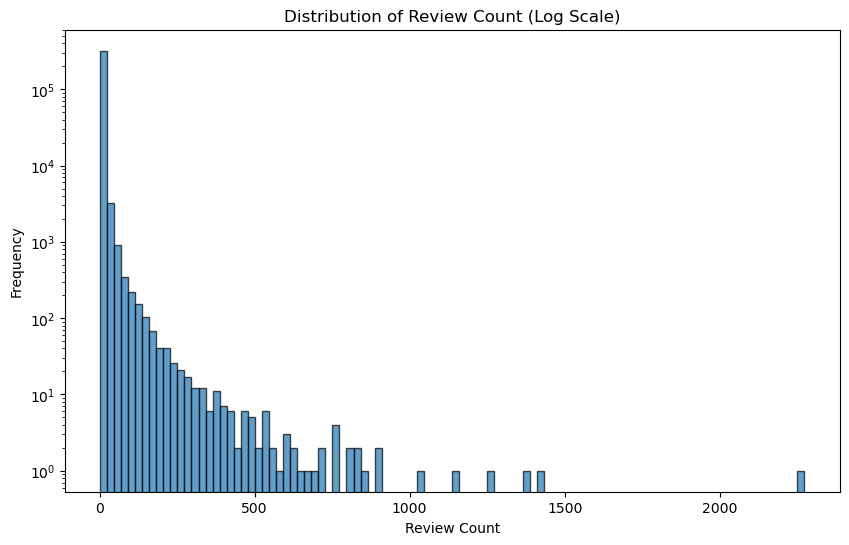

In [48]:
plt.figure(figsize=(10, 6))
plt.hist(df['ReviewCount'], bins=100, edgecolor='k', alpha=0.7)
plt.yscale('log')
plt.title('Distribution of Review Count (Log Scale)')
plt.xlabel('Review Count')
plt.ylabel('Frequency')
plt.show()

In [79]:
df['ReviewCount'] = df['ReviewCount'].replace(0, 1)
df['AggregatedRating'] = df['AggregatedRating'].replace(0, 1)

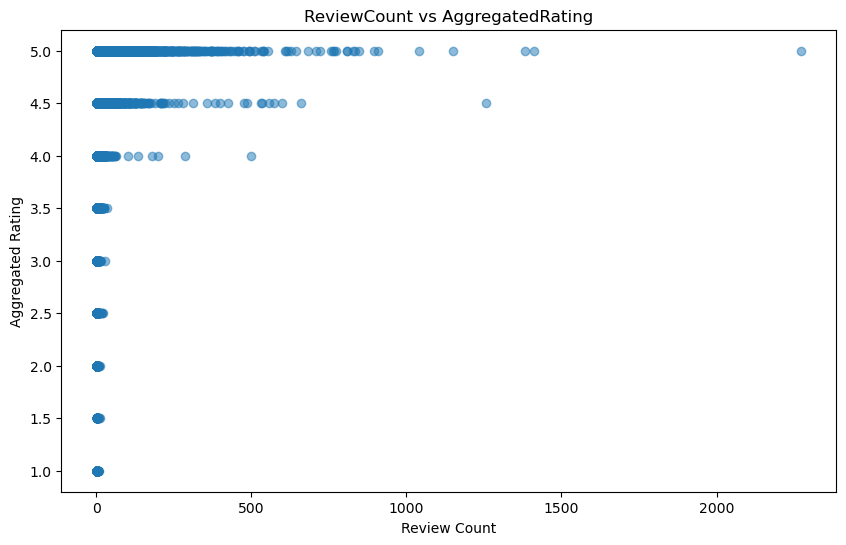

In [81]:
plt.figure(figsize=(10, 6))
plt.scatter(df['ReviewCount'], df['AggregatedRating'], alpha=0.5)
plt.title('ReviewCount vs AggregatedRating')
plt.xlabel('Review Count')
plt.ylabel('Aggregated Rating')
plt.show()

In [99]:
df['Keywords'] = df['Keywords'].fillna('').astype(str)

In [101]:
df['dairy-free'] = df['Keywords'].apply(lambda x: 1 if 'dairy-free' in x else 0)
df['gluten-free'] = df['Keywords'].apply(lambda x: 1 if 'gluten-free' in x else 0)
df['low-carb']= df['Keywords'].apply(lambda x: 1 if 'low-carb' in x else 0)
df['vegan'] = df['Keywords'].apply(lambda x: 1 if 'vegan' in x else 0)
df['vegetarian'] = df['Keywords'].apply(lambda x: 1 if 'vegetarian' in x else 0)

In [112]:
df.head()

,RecipeId,Name,AuthorId,CookTime,PrepTime,TotalTime,Description,Images,RecipeCategory,Keywords,...,1023,NormalizedRating,ReviewCountBins,Rating_x_Ingredients,ReviewCount_x_Ingredients,dairy-free,gluten-free,low-carb,vegan,vegetarian
0,38.0,Low-Fat Berry Blue Frozen Dessert,1533.0,3.306840e-05,0.000347,3.409654e-05,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",Frozen Desserts,"c(""Dessert"", ""Low Protein"", ""Low Cholesterol"",...",...,0.0,0.875,Very Low,769.05,683.6,0,0,0,0,0
4,42.0,Cabbage Soup,1538.0,6.885502e-07,0.000154,1.148032e-06,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",Vegetable,"c(""Low Protein"", ""Vegan"", ""Low Cholesterol"", ""...",...,0.0,0.875,Low,466.20,1139.6,0,0,0,0,0
7,45.0,Buttermilk Pie With Gingersnap Crumb Crust,1580.0,1.147839e-06,0.000231,1.836851e-06,Make and share this Buttermilk Pie With Ginger...,"""https://img.sndimg.com/food/image/upload/w_55...",Pie,"c(""Dessert"", ""Healthy"", ""Weeknight"", ""Oven"", ""...",...,0.0,0.750,Very Low,912.00,684.0,0,0,0,0,0
8,46.0,A Jad - Cucumber Pickle,1533.0,0.000000e+00,0.000193,5.740159e-07,Make and share this A Jad - Cucumber Pickle re...,character(0),Vegetable,"c(""Thai"", ""Asian"", ""Free Of..."", ""< 30 Mins"")",...,0.0,1.000,Very Low,21.50,8.6,0,0,0,0,0
9,47.0,Butter Pecan Cookies,1573.0,2.062972e-07,0.000424,1.469481e-06,Make and share this Butter Pecan Cookies recip...,"c(""https://img.sndimg.com/food/image/upload/w_...",Dessert,"c(""Cookie & Brownie"", ""Fruit"", ""Nuts"", ""Weekni...",...,0.0,0.750,Very Low,276.00,138.0,0,0,0,0,0


In [128]:
def categorize_cuisine(Keywords):
    if 'Italian' in Keywords:
        return 'Italian'
    elif 'Mexican' in Keywords:
        return 'Mexican'
    elif 'Chinese' in Keywords:
        return 'Chinese'
    elif 'Indian' in Keywords:
        return 'Indian'
    elif 'Japanese' in Keywords:
        return 'Japanese'
    elif 'Thai' in Keywords:
        return 'Thai'
    elif 'Asian' in Keywords:
        return 'Asian'
    elif 'Persian' in Keywords:
        return 'Persian'
    elif 'American' in Keywords:
        return 'American'
    # Add more cuisine types as needed
    else:
        return 'Other'

In [141]:
df['CuisineType'] = df['Keywords'].apply(lambda x: categorize_cuisine(x.split(',')))
print(df[['Keywords', 'CuisineType']].head(5))

                                            Keywords CuisineType
0  c("Dessert", "Low Protein", "Low Cholesterol",...       Other
4  c("Low Protein", "Vegan", "Low Cholesterol", "...       Other
7  c("Dessert", "Healthy", "Weeknight", "Oven", "...       Other
8      c("Thai", "Asian", "Free Of...", "< 30 Mins")       Other
9  c("Cookie & Brownie", "Fruit", "Nuts", "Weekni...       Other


In [155]:
#Testing the feature:
italian_recipes = df[df['CuisineType'] == 'Italian']
print(italian_recipes)

Empty DataFrame
Columns: [RecipeId, Name, AuthorId, CookTime, PrepTime, TotalTime, Description, Images, RecipeCategory, Keywords, RecipeIngredientParts, RecipeInstructions, AggregatedRating, ReviewCount, Calories, FatContent, SaturatedFatContent, CholesterolContent, SodiumContent, CarbohydrateContent, FiberContent, SugarContent, ProteinContent, RecipeServings, RecipeYield, AuthorName, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, ...]
Index: []

[0 rows x 1060 columns]


In [151]:
#Testing the feature again.
italian_recipes = df[df['CuisineType'] == 'Indian']
print(italian_recipes)

Empty DataFrame
Columns: [RecipeId, Name, AuthorId, CookTime, PrepTime, TotalTime, Description, Images, RecipeCategory, Keywords, RecipeIngredientParts, RecipeInstructions, AggregatedRating, ReviewCount, Calories, FatContent, SaturatedFatContent, CholesterolContent, SodiumContent, CarbohydrateContent, FiberContent, SugarContent, ProteinContent, RecipeServings, RecipeYield, AuthorName, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, ...]
Index: []

[0 rows x 1060 columns]


In [17]:
df['PrepTimeCategory'] = df['TotalTime'].apply(lambda x: 'Quick' if x < 30 else ('Moderate' if 30 <= x <= 60 else 'Long'))
df = pd.get_dummies(df, columns=['PrepTimeCategory'], prefix='PrepTime')
print(df[['TotalTime', 'PrepTime_Quick', 'PrepTime_Moderate', 'PrepTime_Long']].head())

   TotalTime  PrepTime_Quick  PrepTime_Moderate  PrepTime_Long
0      89100           False              False           True
1      15900           False              False           True
2       2100           False              False           True
3      87600           False              False           True
4       3000           False              False           True


In [31]:
df['PrepTimeCategory'] = df['CookTime'].apply(lambda x: 'Quick' if x < 30 else ('Moderate' if 30 <= x <= 60 else 'Long'))
df = pd.get_dummies(df, columns=['PrepTimeCategory'], prefix='PrepTime')
df['PrepTime_Quick'] = df['PrepTime_Quick'].astype(int)
df['PrepTime_Moderate'] = df['PrepTime_Moderate'].astype(int)
df['PrepTime_Long'] = df['PrepTime_Long'].astype(int)
print(df[['TotalTime', 'PrepTime_Quick', 'PrepTime_Moderate', 'PrepTime_Long']].head())


   TotalTime  PrepTime_Quick  PrepTime_Quick  PrepTime_Quick  PrepTime_Quick  \
0      89100               0               0               0               0   
1      15900               0               0               0               0   
2       2100               0               0               0               0   
3      87600               0               0               0               0   
4       3000               0               0               0               0   

   PrepTime_Moderate  PrepTime_Moderate  PrepTime_Moderate  PrepTime_Moderate  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   PrepTime_Long  PrepTime_Long 

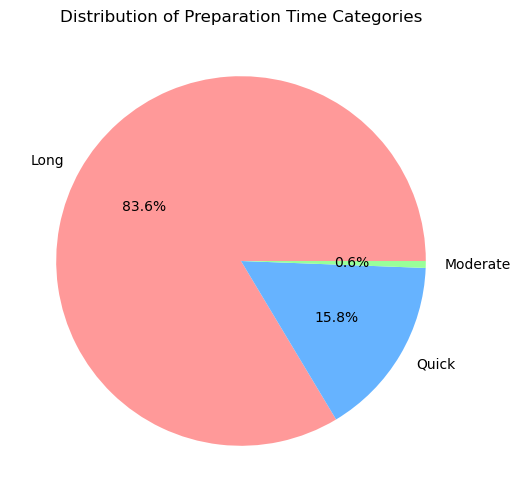

In [33]:
df['PrepTimeCategory'] = df['CookTime'].apply(lambda x: 'Quick' if x < 30 else ('Moderate' if 30 <= x <= 60 else 'Long'))

plt.figure(figsize=(10, 6))
df['PrepTimeCategory'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribution of Preparation Time Categories')
plt.ylabel('')
plt.show()

In [39]:
df['PrepTimeCategory'] = df['CookTime'].apply(lambda x: 'Quick' if x < 30 else ('Moderate' if 30 <= x <= 60 else ('Long' if x > 120 else 'Moderate')))
df = pd.get_dummies(df, columns=['PrepTimeCategory'], prefix='PrepTime')
df['PrepTime_Quick'] = df['PrepTime_Quick'].astype(int)
df['PrepTime_Moderate'] = df['PrepTime_Moderate'].astype(int)
df['PrepTime_Long'] = df['PrepTime_Long'].astype(int)

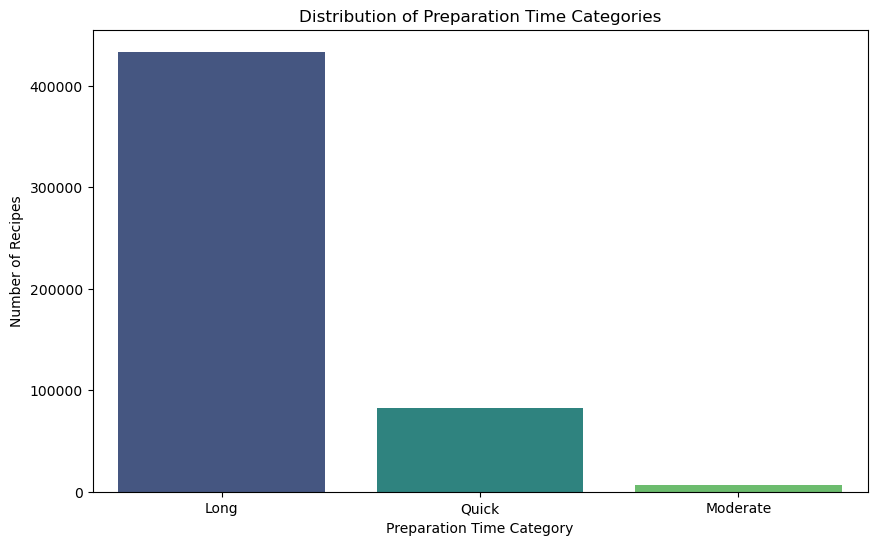

In [37]:
df['PrepTimeCategory'] = df['CookTime'].apply(lambda x: 'Quick' if x < 30 else ('Moderate' if 30 <= x <= 60 else ('Long' if x > 120 else 'Moderate')))
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PrepTimeCategory', palette='viridis')
plt.title('Distribution of Preparation Time Categories')
plt.xlabel('Preparation Time Category')
plt.ylabel('Number of Recipes')
plt.show()

In [41]:
df.to_csv('Recipes_Features.csv', index=False)